# Overview
- Create a portfolio that includes Apple, Cisco, IBM, and Amazon
- Calculate the Sharpe Ratio of such Portfolio
- Visualize Risk-Return Trade Off using Efficient Frontier 
- Find the Best Allocaiton by Using Monte Carlo Simulation and Optimization

---
## Part 1: Create a Portfolio 

- Get 2-year Historical Data of Apple, Cisco, IBM, and Amazon from Quandl
- Calculate Portfolio KPI

In [1]:
import pandas as pd
import numpy as np
import quandl
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define a Start and End Date of Historical Data
start = pd.to_datetime("2012-01-01")
end = pd.to_datetime("2017-01-01")

In [3]:
# Pull data from using Quandl
aapl = quandl.get('WIKI/AAPL.11', start_date = start, end_date = end)
cisco = quandl.get('WIKI/CSCO.11', start_date = start, end_date = end)
ibm = quandl.get('WIKI/IBM.11', start_date = start, end_date = end)
amzn = quandl.get('WIKI/AMZN.11', start_date = start, end_date = end)

In [4]:
aapl.head(10)

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
2012-01-10,54.392239
2012-01-11,54.303564
2012-01-12,54.154488
2012-01-13,53.951436


In [5]:
aapl.iloc[0]['Adj. Close']

52.848786580038002

In [6]:
# Cumulative Return against Day 1

for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [7]:
aapl.head(10)

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533
2012-01-10,54.392239,1.029205
2012-01-11,54.303564,1.027527
2012-01-12,54.154488,1.024706
2012-01-13,53.951436,1.020864


In [8]:
aapl.tail(10)

,Adj. Close,Normed Return
Date,,
2016-12-16,114.537601,2.167270
2016-12-19,115.199326,2.179791
2016-12-20,115.505497,2.185585
2016-12-21,115.614138,2.187640
2016-12-22,114.853649,2.173250
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473


In [9]:
# Assumed Allocation: 30% AAPL, 20% CISCO, 40% AMAZON, 10% IBM
for stock_df, allo in zip((aapl, cisco, ibm, amzn), [.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo


In [10]:
aapl.head(10)

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660
2012-01-10,54.392239,1.029205,0.308762
2012-01-11,54.303564,1.027527,0.308258
2012-01-12,54.154488,1.024706,0.307412
2012-01-13,53.951436,1.020864,0.306259


In [11]:
# Assumed Deployed Capital: $1,000,000
# Calculate Return in $

for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [12]:
aapl.head(10)

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988
2012-01-10,54.392239,1.029205,0.308762,308761.520317
2012-01-11,54.303564,1.027527,0.308258,308258.152372
2012-01-12,54.154488,1.024706,0.307412,307411.910610
2012-01-13,53.951436,1.020864,0.306259,306259.270968


In [13]:
all_pos_vals = [aapl['Position Values'], cisco['Position Values'],
               ibm['Position Values'], amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis = 1)
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [14]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [15]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

In [16]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


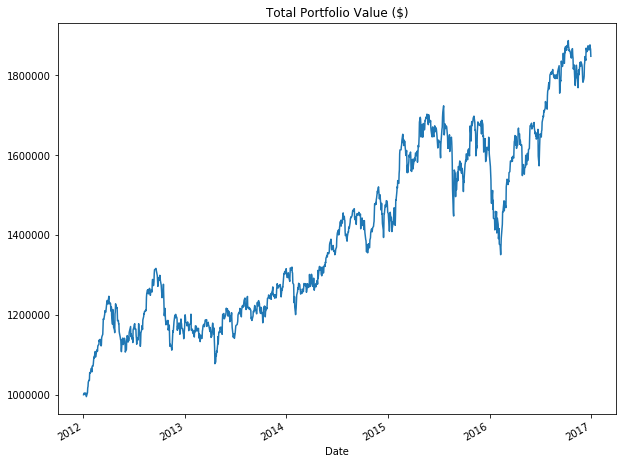

In [17]:
portfolio_val['Total Pos'].plot(figsize = (10, 8));
plt.title('Total Portfolio Value ($)');

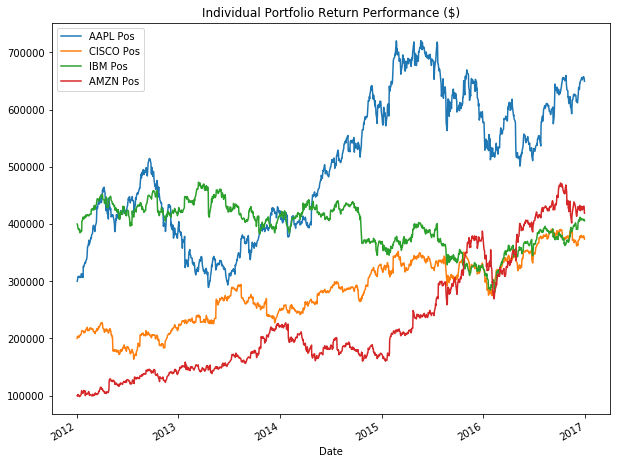

In [18]:
# Plot all Companies Individually 

portfolio_val.drop('Total Pos', axis = 1).plot(figsize = (10, 8));
plt.title('Individual Portfolio Return Performance ($)');

--- 

## Part 2: Calculate Sharpe Ratio for the Portfolio
The Sharpe Ratio represents the average returned acheived in addition to risk-free return per unit of volatility.

- Standard deviation of return 
- Expected Porfolio Return
- Expected Risk-Free Return

Sharpe Ratio = (Mean Portfolio Return - Risk Free Return) / Standard Deviation of Portfolio Return

https://www.investopedia.com/terms/s/sharperatio.asp

In [19]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


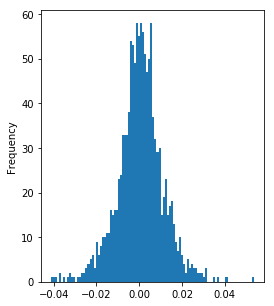

In [20]:
portfolio_val['Daily Return'].plot(kind = 'hist', bins = 100, figsize = (4,5));

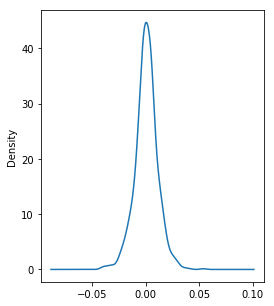

In [21]:
portfolio_val['Daily Return'].plot(kind = 'kde', figsize = (4,5));

In [22]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [23]:
portfolio_val['Daily Return'].std()

0.010568287769161718

In [24]:
cumulative_return = 100*(portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)
cumulative_return

84.742851816655445

In [25]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
SR

0.05149680662648092

In [26]:
# Annualized Sharpe Ratio

ASR = SR * (252**0.5)
ASR

0.8174864618859096

### Note

- SR > 1 is good
- SR = 1 is okay 
- SR < 1 is bad

--- 

## Part 3: Use Efficient Frontier to Find Optimal Portfolio Allocation

- Monte Carlo Simulation Approach
- Optimization Approach

In [27]:
# Create Data Frame
stocks = pd.concat([aapl.iloc[: , 0], cisco.iloc[: , 0], ibm.iloc[: , 0], amzn.iloc[: , 0]], axis = 1)
stocks.columns = ['aapl', 'cisco', 'ibm', 'amzn']
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [28]:
# simulate daily return

stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [29]:
# Correlation between stocks
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [30]:
# Transform to Logarithmic Return for Normality (many analysis assume this property)
log_ret = np.log(stocks / stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


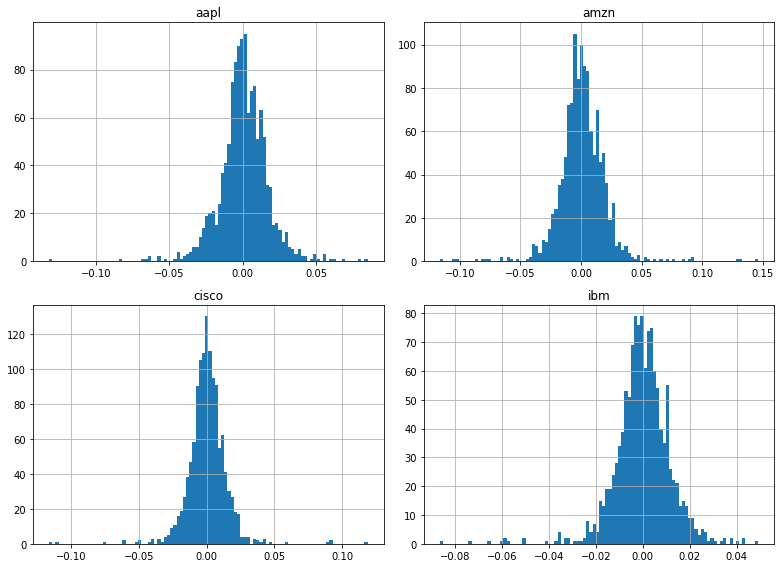

In [31]:
log_ret.hist(bins = 100, figsize = (11,8));
plt.tight_layout()

In [32]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [33]:
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


## Approach 1: Find the Best Sharpe Ratio using Simulation with Randomized Weights

1. randomly select weights allocation using random generator
2. calculate portfolio return, volatility, and Sharpe Ratio for each random weight
3. search for maximum Sharpe Ratio and its corresponding weights, return, and volatility

In [34]:
# Sharpe Ratio Randomization
np.random.seed(101)
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind, :] = weights

    # Expected Average Return based on 2-year historical data
    ret_arr[ind] = np.sum((log_ret.mean()*weights)*252)

    # Expected Volatility (Variance)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]


In [35]:
sharpe_arr.max()

1.0303260551271305

In [36]:
sharpe_arr.argmax()

1420

In [37]:
all_weights[1420, :]

array([ 0.26188068,  0.20759516,  0.00110226,  0.5294219 ])

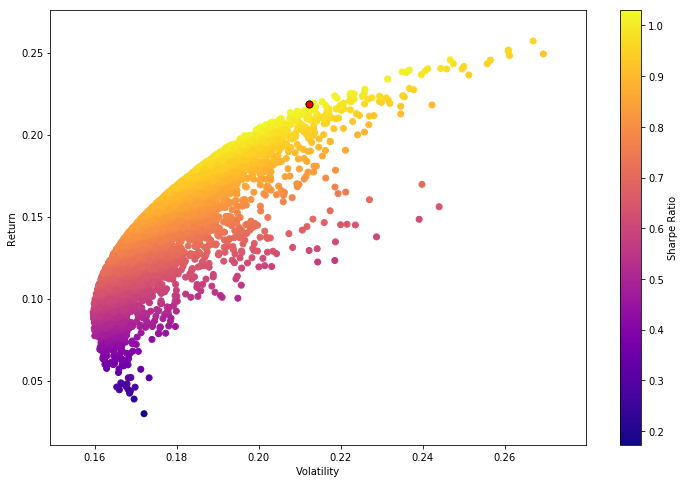

In [38]:
# Plot the Efficient Frontier
plt.figure(figsize = (12, 8));
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'plasma');
plt.colorbar(label = 'Sharpe Ratio');
plt.xlabel('Volatility');
plt.ylabel('Return');

# Add Red Dots for the Max Return
plt.scatter(vol_arr[sharpe_arr.argmax()],ret_arr[sharpe_arr.argmax()], c = 'red', s = 50, edgecolors = 'black');

## Approach 2: Use Optimization Approach to Find Best SR

1. Create a minimizing optimization using Scipy
2. Create variables, objective function, constraints, boundary conditions, and initial condition
3. Run optimizer
4. Find the optimal Sharpe Ratio and Weights using Optimizer Outputs

In [39]:
# Variables: weights

def get_ret_vol_sr(weights):
    '''
    This function returns an array of portfolio return, volatility, and Sharpe Ratio. It uses the user specified 
    allocation weights and 2-year historical stock return to calculate Volatility and SR
    Input: Weights of allocation
    Output: an array of return, volatility, and SR
    '''
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

In [40]:
# Objective Function: Sharpe Ratio based on Input Weights

def neg_sharpe(weights):
    '''
    This is a helper function for the Optimizer. We want to maximize Sharpe by minimizing the 
    negative of the Sharpe by multipling by -1
    '''
    return get_ret_vol_sr(weights)[2] * -1

In [41]:
# Constraints

def check_sum(weights):
    '''
    This is a helper function for constraints. Return 0 if the sum of the weights is 1.
    '''
    return np.sum(weights) - 1

cons = ({'type':'eq', 'fun':check_sum})

In [43]:
# Boundary Conditions of Input Variables (weights)

bounds = ((0,1), (0,1), (0,1), (0,1))

In [44]:
# Initial Conditions (even weights)

init_guess = [0.25, 0.25, 0.25, 0.25]

In [48]:
# Run the Optimization

opt_results = minimize(neg_sharpe, init_guess, method = 'SLSQP', bounds = bounds, constraints=cons)
opt_results

     fun: -1.0307168703346878
     jac: array([  5.64306974e-05,   4.18275595e-05,   3.39921713e-01,
        -4.45246696e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.26628978,  0.20418982,  0.        ,  0.5295204 ])

In [46]:
# Find the Optimal Weights that Lead to the Maximum Sharpe Ratio

opt_results.x

array([ 0.26628978,  0.20418982,  0.        ,  0.5295204 ])

In [47]:
# Return the Portfolio Return, Volatility, and Sharpe Ratio

get_ret_vol_sr(opt_results.x)

array([ 0.21885915,  0.21233683,  1.03071687])

### Note

The results from the Optimization and Monte Carlo Approaches are aligned. 

The maximum Sharpe Ratio is ~1.03 with 26.6% Apple, 20.4% Cisco, 0% IBM, and 54.0% Amazon. The respective annual return is ~22% and volatility of 0.21 assuming historical trends continue.  